In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import warnings
df=pd.read_csv('bbc.csv')
df.head()

,text,likes,comments,shares
0,Queen Camilla was given a miniature version of...,577,228,50
1,"The study found females of five ""menopausal"" w...",174,18,52
2,The Ivy League university is named after Elihu...,116,59,44
3,"When the law passed in 2019, it sparked mass p...",133,56,16
4,"Freedom Village is located inside Korea's DMZ,...",117,18,26


In [3]:
df.shape

(1000, 4)

In [4]:
df.isnull().sum()

text        0
likes       0
comments    0
shares      0
dtype: int64

In [5]:
df.describe()

,likes,comments,shares
count,1000.000000,1000.000000,1000.000000
mean,805.666000,246.535000,67.735000
std,1675.747187,286.764026,120.955202
min,116.000000,0.000000,9.000000
25%,305.750000,83.000000,28.000000
50%,453.000000,158.000000,42.000000
75%,729.000000,298.000000,64.250000
max,31451.000000,3535.000000,1793.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      1000 non-null   object
 1   likes     1000 non-null   int64 
 2   comments  1000 non-null   int64 
 3   shares    1000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 31.4+ KB


In [7]:
df.nunique()

text        999
likes       644
comments    461
shares      184
dtype: int64

In [8]:
df.columns

Index(['text', 'likes', 'comments', 'shares'], dtype='object')

In [9]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer
from collections import Counter

In [10]:
# Tokenize the text column into sentences
df['sentences'] = df['text'].apply(sent_tokenize)

In [11]:
# Tokenize the sentences into words
df['words'] = df['sentences'].apply(lambda x: [word_tokenize(sent) for sent in x])

In [12]:
df

,text,likes,comments,shares,sentences,words
0,Queen Camilla was given a miniature version of...,577,228,50,[Queen Camilla was given a miniature version o...,"[[Queen, Camilla, was, given, a, miniature, ve..."
1,"The study found females of five ""menopausal"" w...",174,18,52,"[The study found females of five ""menopausal"" ...","[[The, study, found, females, of, five, ``, me..."
2,The Ivy League university is named after Elihu...,116,59,44,[The Ivy League university is named after Elih...,"[[The, Ivy, League, university, is, named, aft..."
3,"When the law passed in 2019, it sparked mass p...",133,56,16,"[When the law passed in 2019, it sparked mass ...","[[When, the, law, passed, in, 2019, ,, it, spa..."
4,"Freedom Village is located inside Korea's DMZ,...",117,18,26,[Freedom Village is located inside Korea's DMZ...,"[[Freedom, Village, is, located, inside, Korea..."
...,...,...,...,...,...,...
995,The animals were discovered in small film cani...,838,129,61,[The animals were discovered in small film can...,"[[The, animals, were, discovered, in, small, f..."
996,"George Freeman had a salary of £118,300.",662,420,78,"[George Freeman had a salary of £118,300.]","[[George, Freeman, had, a, salary, of, £118,30..."
997,Valdo Calocane admitted manslaughter on the gr...,285,228,34,[Valdo Calocane admitted manslaughter on the g...,"[[Valdo, Calocane, admitted, manslaughter, on,..."
998,The US blamed Iranian-backed groups and said t...,638,447,52,[The US blamed Iranian-backed groups and said ...,"[[The, US, blamed, Iranian-backed, groups, and..."


In [15]:
df.iloc[0,:]

text         Queen Camilla was given a miniature version of...
likes                                                      577
comments                                                   228
shares                                                      50
sentences    [Queen Camilla was given a miniature version o...
words        [[Queen, Camilla, was, given, a, miniature, ve...
Name: 0, dtype: object

In [16]:
import string
# Remove punctuation marks
punctuations = string.punctuation
df['words_no_punct'] = df['words'].apply(lambda x: [[word.translate(str.maketrans('', '', string.punctuation)) for word in sent] for sent in x])

In [17]:
df

,text,likes,comments,shares,sentences,words,words_no_punct
0,Queen Camilla was given a miniature version of...,577,228,50,[Queen Camilla was given a miniature version o...,"[[Queen, Camilla, was, given, a, miniature, ve...","[[Queen, Camilla, was, given, a, miniature, ve..."
1,"The study found females of five ""menopausal"" w...",174,18,52,"[The study found females of five ""menopausal"" ...","[[The, study, found, females, of, five, ``, me...","[[The, study, found, females, of, five, , meno..."
2,The Ivy League university is named after Elihu...,116,59,44,[The Ivy League university is named after Elih...,"[[The, Ivy, League, university, is, named, aft...","[[The, Ivy, League, university, is, named, aft..."
3,"When the law passed in 2019, it sparked mass p...",133,56,16,"[When the law passed in 2019, it sparked mass ...","[[When, the, law, passed, in, 2019, ,, it, spa...","[[When, the, law, passed, in, 2019, , it, spar..."
4,"Freedom Village is located inside Korea's DMZ,...",117,18,26,[Freedom Village is located inside Korea's DMZ...,"[[Freedom, Village, is, located, inside, Korea...","[[Freedom, Village, is, located, inside, Korea..."
...,...,...,...,...,...,...,...
995,The animals were discovered in small film cani...,838,129,61,[The animals were discovered in small film can...,"[[The, animals, were, discovered, in, small, f...","[[The, animals, were, discovered, in, small, f..."
996,"George Freeman had a salary of £118,300.",662,420,78,"[George Freeman had a salary of £118,300.]","[[George, Freeman, had, a, salary, of, £118,30...","[[George, Freeman, had, a, salary, of, £118300..."
997,Valdo Calocane admitted manslaughter on the gr...,285,228,34,[Valdo Calocane admitted manslaughter on the g...,"[[Valdo, Calocane, admitted, manslaughter, on,...","[[Valdo, Calocane, admitted, manslaughter, on,..."
998,The US blamed Iranian-backed groups and said t...,638,447,52,[The US blamed Iranian-backed groups and said ...,"[[The, US, blamed, Iranian-backed, groups, and...","[[The, US, blamed, Iranianbacked, groups, and,..."


In [18]:
# Remove stop words
stop_words = set(stopwords.words('english'))
df['words_cleaned'] = df['words_no_punct'].apply(lambda x: [[word for word in sent if word.lower() not in stop_words] for sent in x])

In [19]:
df

,text,likes,comments,shares,sentences,words,words_no_punct,words_cleaned
0,Queen Camilla was given a miniature version of...,577,228,50,[Queen Camilla was given a miniature version o...,"[[Queen, Camilla, was, given, a, miniature, ve...","[[Queen, Camilla, was, given, a, miniature, ve...","[[Queen, Camilla, given, miniature, version, ,..."
1,"The study found females of five ""menopausal"" w...",174,18,52,"[The study found females of five ""menopausal"" ...","[[The, study, found, females, of, five, ``, me...","[[The, study, found, females, of, five, , meno...","[[study, found, females, five, , menopausal, ,..."
2,The Ivy League university is named after Elihu...,116,59,44,[The Ivy League university is named after Elih...,"[[The, Ivy, League, university, is, named, aft...","[[The, Ivy, League, university, is, named, aft...","[[Ivy, League, university, named, Elihu, Yale,..."
3,"When the law passed in 2019, it sparked mass p...",133,56,16,"[When the law passed in 2019, it sparked mass ...","[[When, the, law, passed, in, 2019, ,, it, spa...","[[When, the, law, passed, in, 2019, , it, spar...","[[law, passed, 2019, , sparked, mass, protests..."
4,"Freedom Village is located inside Korea's DMZ,...",117,18,26,[Freedom Village is located inside Korea's DMZ...,"[[Freedom, Village, is, located, inside, Korea...","[[Freedom, Village, is, located, inside, Korea...","[[Freedom, Village, located, inside, Korea, DM..."
...,...,...,...,...,...,...,...,...
995,The animals were discovered in small film cani...,838,129,61,[The animals were discovered in small film can...,"[[The, animals, were, discovered, in, small, f...","[[The, animals, were, discovered, in, small, f...","[[animals, discovered, small, film, canisters,..."
996,"George Freeman had a salary of £118,300.",662,420,78,"[George Freeman had a salary of £118,300.]","[[George, Freeman, had, a, salary, of, £118,30...","[[George, Freeman, had, a, salary, of, £118300...","[[George, Freeman, salary, £118300, ]]"
997,Valdo Calocane admitted manslaughter on the gr...,285,228,34,[Valdo Calocane admitted manslaughter on the g...,"[[Valdo, Calocane, admitted, manslaughter, on,...","[[Valdo, Calocane, admitted, manslaughter, on,...","[[Valdo, Calocane, admitted, manslaughter, gro..."
998,The US blamed Iranian-backed groups and said t...,638,447,52,[The US blamed Iranian-backed groups and said ...,"[[The, US, blamed, Iranian-backed, groups, and...","[[The, US, blamed, Iranianbacked, groups, and,...","[[US, blamed, Iranianbacked, groups, said, att..."


In [20]:
# Stem the words
stemmer = PorterStemmer()
df['words_stemmed'] = df['words_cleaned'].apply(lambda x: [[stemmer.stem(word) for word in sent] for sent in x])

In [21]:
df

,text,likes,comments,shares,sentences,words,words_no_punct,words_cleaned,words_stemmed
0,Queen Camilla was given a miniature version of...,577,228,50,[Queen Camilla was given a miniature version o...,"[[Queen, Camilla, was, given, a, miniature, ve...","[[Queen, Camilla, was, given, a, miniature, ve...","[[Queen, Camilla, given, miniature, version, ,...","[[queen, camilla, given, miniatur, version, , ..."
1,"The study found females of five ""menopausal"" w...",174,18,52,"[The study found females of five ""menopausal"" ...","[[The, study, found, females, of, five, ``, me...","[[The, study, found, females, of, five, , meno...","[[study, found, females, five, , menopausal, ,...","[[studi, found, femal, five, , menopaus, , wha..."
2,The Ivy League university is named after Elihu...,116,59,44,[The Ivy League university is named after Elih...,"[[The, Ivy, League, university, is, named, aft...","[[The, Ivy, League, university, is, named, aft...","[[Ivy, League, university, named, Elihu, Yale,...","[[ivi, leagu, univers, name, elihu, yale, , co..."
3,"When the law passed in 2019, it sparked mass p...",133,56,16,"[When the law passed in 2019, it sparked mass ...","[[When, the, law, passed, in, 2019, ,, it, spa...","[[When, the, law, passed, in, 2019, , it, spar...","[[law, passed, 2019, , sparked, mass, protests...","[[law, pass, 2019, , spark, mass, protest, sco..."
4,"Freedom Village is located inside Korea's DMZ,...",117,18,26,[Freedom Village is located inside Korea's DMZ...,"[[Freedom, Village, is, located, inside, Korea...","[[Freedom, Village, is, located, inside, Korea...","[[Freedom, Village, located, inside, Korea, DM...","[[freedom, villag, locat, insid, korea, dmz, ,..."
...,...,...,...,...,...,...,...,...,...
995,The animals were discovered in small film cani...,838,129,61,[The animals were discovered in small film can...,"[[The, animals, were, discovered, in, small, f...","[[The, animals, were, discovered, in, small, f...","[[animals, discovered, small, film, canisters,...","[[anim, discov, small, film, canist, dehydr, s..."
996,"George Freeman had a salary of £118,300.",662,420,78,"[George Freeman had a salary of £118,300.]","[[George, Freeman, had, a, salary, of, £118,30...","[[George, Freeman, had, a, salary, of, £118300...","[[George, Freeman, salary, £118300, ]]","[[georg, freeman, salari, £118300, ]]"
997,Valdo Calocane admitted manslaughter on the gr...,285,228,34,[Valdo Calocane admitted manslaughter on the g...,"[[Valdo, Calocane, admitted, manslaughter, on,...","[[Valdo, Calocane, admitted, manslaughter, on,...","[[Valdo, Calocane, admitted, manslaughter, gro...","[[valdo, calocan, admit, manslaught, ground, d..."
998,The US blamed Iranian-backed groups and said t...,638,447,52,[The US blamed Iranian-backed groups and said ...,"[[The, US, blamed, Iranian-backed, groups, and...","[[The, US, blamed, Iranianbacked, groups, and,...","[[US, blamed, Iranianbacked, groups, said, att...","[[us, blame, iranianback, group, said, attack,..."


In [22]:
# Flatten the list of lists
df['words_flat'] = df['words_stemmed'].apply(lambda x: [item for sublist in x for item in sublist])

In [23]:
df

,text,likes,comments,shares,sentences,words,words_no_punct,words_cleaned,words_stemmed,words_flat
0,Queen Camilla was given a miniature version of...,577,228,50,[Queen Camilla was given a miniature version o...,"[[Queen, Camilla, was, given, a, miniature, ve...","[[Queen, Camilla, was, given, a, miniature, ve...","[[Queen, Camilla, given, miniature, version, ,...","[[queen, camilla, given, miniatur, version, , ...","[queen, camilla, given, miniatur, version, , b..."
1,"The study found females of five ""menopausal"" w...",174,18,52,"[The study found females of five ""menopausal"" ...","[[The, study, found, females, of, five, ``, me...","[[The, study, found, females, of, five, , meno...","[[study, found, females, five, , menopausal, ,...","[[studi, found, femal, five, , menopaus, , wha...","[studi, found, femal, five, , menopaus, , whal..."
2,The Ivy League university is named after Elihu...,116,59,44,[The Ivy League university is named after Elih...,"[[The, Ivy, League, university, is, named, aft...","[[The, Ivy, League, university, is, named, aft...","[[Ivy, League, university, named, Elihu, Yale,...","[[ivi, leagu, univers, name, elihu, yale, , co...","[ivi, leagu, univers, name, elihu, yale, , col..."
3,"When the law passed in 2019, it sparked mass p...",133,56,16,"[When the law passed in 2019, it sparked mass ...","[[When, the, law, passed, in, 2019, ,, it, spa...","[[When, the, law, passed, in, 2019, , it, spar...","[[law, passed, 2019, , sparked, mass, protests...","[[law, pass, 2019, , spark, mass, protest, sco...","[law, pass, 2019, , spark, mass, protest, scor..."
4,"Freedom Village is located inside Korea's DMZ,...",117,18,26,[Freedom Village is located inside Korea's DMZ...,"[[Freedom, Village, is, located, inside, Korea...","[[Freedom, Village, is, located, inside, Korea...","[[Freedom, Village, located, inside, Korea, DM...","[[freedom, villag, locat, insid, korea, dmz, ,...","[freedom, villag, locat, insid, korea, dmz, , ..."
...,...,...,...,...,...,...,...,...,...,...
995,The animals were discovered in small film cani...,838,129,61,[The animals were discovered in small film can...,"[[The, animals, were, discovered, in, small, f...","[[The, animals, were, discovered, in, small, f...","[[animals, discovered, small, film, canisters,...","[[anim, discov, small, film, canist, dehydr, s...","[anim, discov, small, film, canist, dehydr, st..."
996,"George Freeman had a salary of £118,300.",662,420,78,"[George Freeman had a salary of £118,300.]","[[George, Freeman, had, a, salary, of, £118,30...","[[George, Freeman, had, a, salary, of, £118300...","[[George, Freeman, salary, £118300, ]]","[[georg, freeman, salari, £118300, ]]","[georg, freeman, salari, £118300, ]"
997,Valdo Calocane admitted manslaughter on the gr...,285,228,34,[Valdo Calocane admitted manslaughter on the g...,"[[Valdo, Calocane, admitted, manslaughter, on,...","[[Valdo, Calocane, admitted, manslaughter, on,...","[[Valdo, Calocane, admitted, manslaughter, gro...","[[valdo, calocan, admit, manslaught, ground, d...","[valdo, calocan, admit, manslaught, ground, di..."
998,The US blamed Iranian-backed groups and said t...,638,447,52,[The US blamed Iranian-backed groups and said ...,"[[The, US, blamed, Iranian-backed, groups, and...","[[The, US, blamed, Iranianbacked, groups, and,...","[[US, blamed, Iranianbacked, groups, said, att...","[[us, blame, iranianback, group, said, attack,...","[us, blame, iranianback, group, said, attack, ..."


In [24]:
# Count word frequencies
word_counts = Counter()
for words in df['words_flat']:
    word_counts.update(words)

In [25]:
word_counts

Counter({'': 2570,
         'said': 110,
         'year': 56,
         'peopl': 52,
         'us': 52,
         'bbc': 48,
         'one': 45,
         'via': 43,
         'nt': 34,
         'would': 31,
         'futur': 31,
         'found': 29,
         'world': 29,
         'two': 29,
         'first': 28,
         'read': 27,
         'http': 27,
         'could': 27,
         'presid': 26,
         'like': 26,
         'polic': 26,
         'uk': 24,
         'time': 23,
         'last': 23,
         'show': 22,
         'live': 21,
         'get': 21,
         'former': 20,
         'make': 20,
         'go': 19,
         'use': 19,
         'home': 18,
         'film': 18,
         'death': 17,
         'day': 17,
         'say': 17,
         'attack': 17,
         'come': 17,
         'die': 16,
         'citi': 16,
         'london': 16,
         'king': 16,
         'three': 15,
         'award': 15,
         'around': 15,
         'want': 15,
         'face': 14,
         '

In [26]:
# Print the most common words
print("Most common words:")
for word, count in word_counts.most_common(10):
    print(f"{word}: {count}")

Most common words:
: 2570
said: 110
year: 56
peopl: 52
us: 52
bbc: 48
one: 45
via: 43
nt: 34
would: 31


In [27]:
from nltk.sentiment import SentimentIntensityAnalyzer
# Initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()

In [28]:
# Function to calculate sentiment scores
def calculate_sentiment(text):
    scores = sid.polarity_scores(text)
    return scores['compound']

In [29]:
# Apply the sentiment analysis function to the 'text' column
df['sentiment_score'] = df['text'].apply(calculate_sentiment)

# Print the sentiment scores
print(df[['text', 'sentiment_score']])

                                                  text  sentiment_score
0    Queen Camilla was given a miniature version of...           0.0000
1    The study found females of five "menopausal" w...           0.0000
2    The Ivy League university is named after Elihu...           0.0000
3    When the law passed in 2019, it sparked mass p...          -0.8350
4    Freedom Village is located inside Korea's DMZ,...           0.6369
..                                                 ...              ...
995  The animals were discovered in small film cani...          -0.3400
996           George Freeman had a salary of £118,300.           0.4019
997  Valdo Calocane admitted manslaughter on the gr...          -0.5859
998  The US blamed Iranian-backed groups and said t...          -0.7351
999  "We've probably got more hedgerows in England ...           0.0000

[1000 rows x 2 columns]


In [30]:
import matplotlib.pyplot as plt


In [31]:
# Categorize sentiment scores into positive, neutral, and negative
bins = [-1, -0.05, 0.05, 1]
labels = ['Negative', 'Neutral', 'Positive']
df['sentiment_category'] = pd.cut(df['sentiment_score'], bins=bins, labels=labels)

In [32]:
df

,text,likes,comments,shares,sentences,words,words_no_punct,words_cleaned,words_stemmed,words_flat,sentiment_score,sentiment_category
0,Queen Camilla was given a miniature version of...,577,228,50,[Queen Camilla was given a miniature version o...,"[[Queen, Camilla, was, given, a, miniature, ve...","[[Queen, Camilla, was, given, a, miniature, ve...","[[Queen, Camilla, given, miniature, version, ,...","[[queen, camilla, given, miniatur, version, , ...","[queen, camilla, given, miniatur, version, , b...",0.0000,Neutral
1,"The study found females of five ""menopausal"" w...",174,18,52,"[The study found females of five ""menopausal"" ...","[[The, study, found, females, of, five, ``, me...","[[The, study, found, females, of, five, , meno...","[[study, found, females, five, , menopausal, ,...","[[studi, found, femal, five, , menopaus, , wha...","[studi, found, femal, five, , menopaus, , whal...",0.0000,Neutral
2,The Ivy League university is named after Elihu...,116,59,44,[The Ivy League university is named after Elih...,"[[The, Ivy, League, university, is, named, aft...","[[The, Ivy, League, university, is, named, aft...","[[Ivy, League, university, named, Elihu, Yale,...","[[ivi, leagu, univers, name, elihu, yale, , co...","[ivi, leagu, univers, name, elihu, yale, , col...",0.0000,Neutral
3,"When the law passed in 2019, it sparked mass p...",133,56,16,"[When the law passed in 2019, it sparked mass ...","[[When, the, law, passed, in, 2019, ,, it, spa...","[[When, the, law, passed, in, 2019, , it, spar...","[[law, passed, 2019, , sparked, mass, protests...","[[law, pass, 2019, , spark, mass, protest, sco...","[law, pass, 2019, , spark, mass, protest, scor...",-0.8350,Negative
4,"Freedom Village is located inside Korea's DMZ,...",117,18,26,[Freedom Village is located inside Korea's DMZ...,"[[Freedom, Village, is, located, inside, Korea...","[[Freedom, Village, is, located, inside, Korea...","[[Freedom, Village, located, inside, Korea, DM...","[[freedom, villag, locat, insid, korea, dmz, ,...","[freedom, villag, locat, insid, korea, dmz, , ...",0.6369,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
995,The animals were discovered in small film cani...,838,129,61,[The animals were discovered in small film can...,"[[The, animals, were, discovered, in, small, f...","[[The, animals, were, discovered, in, small, f...","[[animals, discovered, small, film, canisters,...","[[anim, discov, small, film, canist, dehydr, s...","[anim, discov, small, film, canist, dehydr, st...",-0.3400,Negative
996,"George Freeman had a salary of £118,300.",662,420,78,"[George Freeman had a salary of £118,300.]","[[George, Freeman, had, a, salary, of, £118,30...","[[George, Freeman, had, a, salary, of, £118300...","[[George, Freeman, salary, £118300, ]]","[[georg, freeman, salari, £118300, ]]","[georg, freeman, salari, £118300, ]",0.4019,Positive
997,Valdo Calocane admitted manslaughter on the gr...,285,228,34,[Valdo Calocane admitted manslaughter on the g...,"[[Valdo, Calocane, admitted, manslaughter, on,...","[[Valdo, Calocane, admitted, manslaughter, on,...","[[Valdo, Calocane, admitted, manslaughter, gro...","[[valdo, calocan, admit, manslaught, ground, d...","[valdo, calocan, admit, manslaught, ground, di...",-0.5859,Negative
998,The US blamed Iranian-backed groups and said t...,638,447,52,[The US blamed Iranian-backed groups and said ...,"[[The, US, blamed, Iranian-backed, groups, and...","[[The, US, blamed, Iranianbacked, groups, and,...","[[US, blamed, Iranianbacked, groups, said, att...","[[us, blame, iranianback, group, said, attack,...","[us, blame, iranianback, group, said, attack, ...",-0.7351,Negative


In [33]:
# Count the occurrences of each sentiment category
sentiment_counts = df['sentiment_category'].value_counts()

In [34]:
sentiment_counts

sentiment_category
Neutral     395
Negative    315
Positive    290
Name: count, dtype: int64

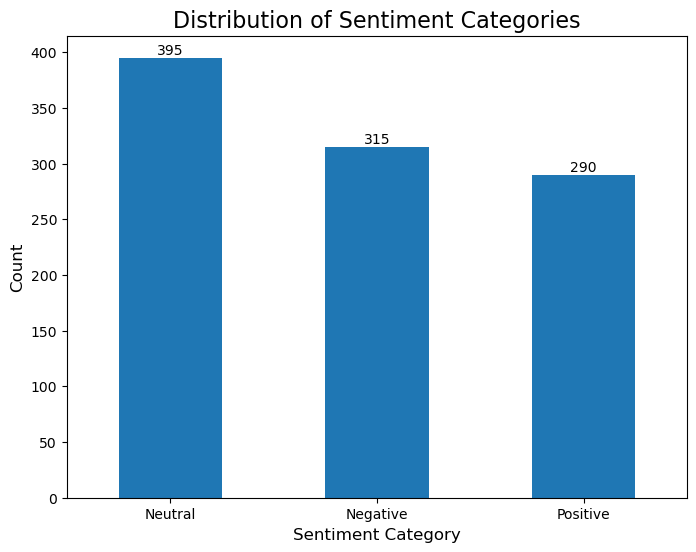

In [35]:
# Create a bar plot
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar')
plt.xlabel('Sentiment Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Sentiment Categories', fontsize=16)
plt.xticks(rotation=0)

# Add value labels on top of the bars
for i, v in enumerate(sentiment_counts.values):
    plt.text(i, v, str(v), fontsize=10, horizontalalignment='center', verticalalignment='bottom')

plt.show()

In [36]:
# Overall Engagement Levels
print("Overall Engagement Levels:")
print("Total Likes:", df['likes'].sum())
print("Total Comments:", df['comments'].sum())
print("Total Shares:", df['shares'].sum())

Overall Engagement Levels:
Total Likes: 805666
Total Comments: 246535
Total Shares: 67735


C:\Users\himan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\himan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\himan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


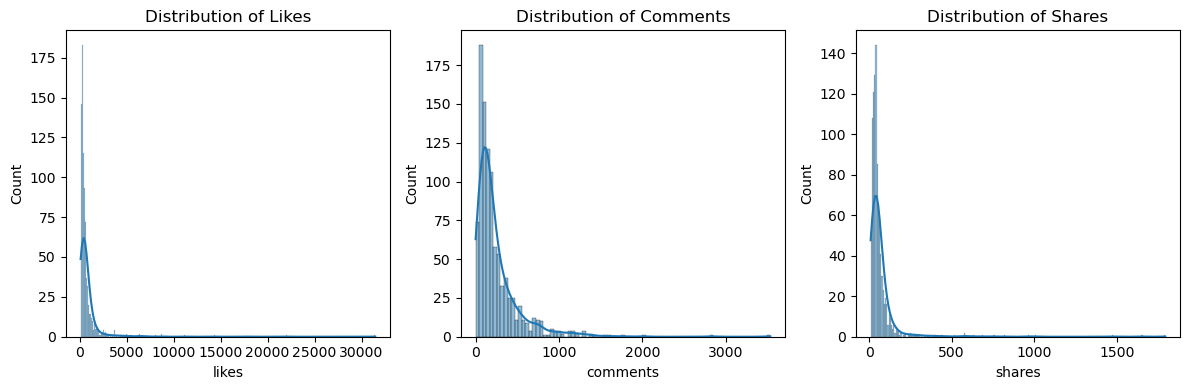

In [37]:
import seaborn as sns
# Engagement Distribution
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.histplot(df['likes'], kde=True)
plt.title('Distribution of Likes')

plt.subplot(1, 3, 2)
sns.histplot(df['comments'], kde=True)
plt.title('Distribution of Comments')

plt.subplot(1, 3, 3)
sns.histplot(df['shares'], kde=True)
plt.title('Distribution of Shares')

plt.tight_layout()
plt.show()

In [38]:
# Correlation Analysis
engagement_corr = df[['likes', 'comments', 'shares']].corr()
print("\nCorrelation Matrix:")
print(engagement_corr)


Correlation Matrix:
             likes  comments    shares
likes     1.000000  0.365673  0.667817
comments  0.365673  1.000000  0.386269
shares    0.667817  0.386269  1.000000


In [39]:
# Engagement by Sentiment
sentiment_engagement = df.groupby('sentiment_category')[['likes', 'comments', 'shares']].sum().reset_index()
print("\nEngagement by Sentiment:")
print(sentiment_engagement)


Engagement by Sentiment:
  sentiment_category   likes  comments  shares
0           Negative  221351     86017   20955
1            Neutral  295069     94399   24885
2           Positive  289246     66119   21895


C:\Users\himan\AppData\Local\Temp\ipykernel_20268\3910728675.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sentiment_engagement = df.groupby('sentiment_category')[['likes', 'comments', 'shares']].sum().reset_index()


In [40]:
# Engagement Ratios by Sentiment
engagement_ratios_by_sentiment = df.groupby('sentiment_category')[['likes', 'comments', 'shares']].sum().reset_index()
engagement_ratios_by_sentiment['comments_to_likes'] = engagement_ratios_by_sentiment['comments'] / engagement_ratios_by_sentiment['likes']
engagement_ratios_by_sentiment['shares_to_likes'] = engagement_ratios_by_sentiment['shares'] / engagement_ratios_by_sentiment['likes']

C:\Users\himan\AppData\Local\Temp\ipykernel_20268\1636423700.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  engagement_ratios_by_sentiment = df.groupby('sentiment_category')[['likes', 'comments', 'shares']].sum().reset_index()


In [41]:
engagement_ratios_by_sentiment

,sentiment_category,likes,comments,shares,comments_to_likes,shares_to_likes
0,Negative,221351,86017,20955,0.388600,0.094669
1,Neutral,295069,94399,24885,0.319922,0.084336
2,Positive,289246,66119,21895,0.228591,0.075697


In [42]:
print("\nEngagement Ratios by Sentiment:")
print(engagement_ratios_by_sentiment[['sentiment_category', 'comments_to_likes', 'shares_to_likes']])


Engagement Ratios by Sentiment:
  sentiment_category  comments_to_likes  shares_to_likes
0           Negative           0.388600         0.094669
1            Neutral           0.319922         0.084336
2           Positive           0.228591         0.075697


C:\Users\himan\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\himan\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


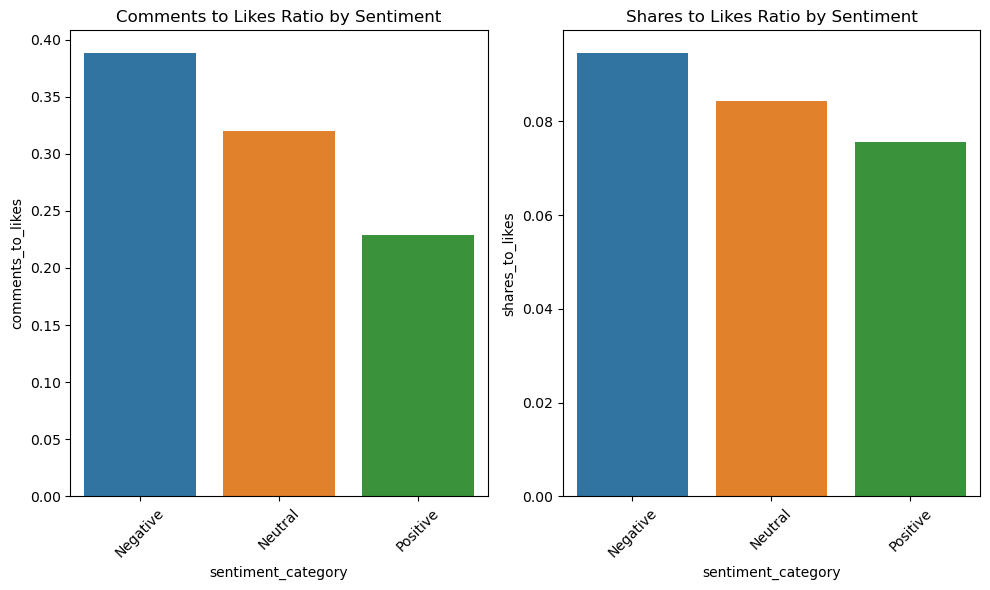

In [43]:
# Visualize Engagement Ratios by Sentiment
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='sentiment_category', y='comments_to_likes', data=engagement_ratios_by_sentiment)
plt.title('Comments to Likes Ratio by Sentiment')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x='sentiment_category', y='shares_to_likes', data=engagement_ratios_by_sentiment)
plt.title('Shares to Likes Ratio by Sentiment')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# The ratios indicate that the sentiment of the content has a significant impact on user engagement behaviors. For example:

## Negative sentiment tends to provoke more comments compared to positive or neutral sentiment. This could be because negative content often elicits strong emotional reactions or prompts users to express their opinions or concerns.

## Positive sentiment, while still generating engagement, may result in fewer comments and shares compared to negative sentiment. This suggests that positive content might be more likely to be passively consumed or enjoyed without necessarily prompting extensive discussion or sharing.

## Neutral sentiment falls between negative and positive sentiment in terms of engagement metrics, indicating a moderate level of interaction from users